# **Eksploracyjna Analiza Danych: Titanic Dataset**

<div style="text-align:center;">
  <img src="https://upload.wikimedia.org/wikipedia/commons/7/79/Titanic_launched_at_Belfast.jpg" style="width:100%; height:auto;">
</div>

## **Wprowadzenie**
RMS Titanic wyruszył w swój dziewiczy rejs z Southampton 10 kwietnia 1912 r. Cztery dni później, w nocy z 14 na 15 kwietnia, uderzył w górę lodową i zatonął po ok. 2 godzinach i 40 minutach — o 02:20. Na pokładzie było ok. 2,200 osób; zginęło ponad 1,500, co uczyniło tę katastrofę jedną z najtragiczniejszych w historii żeglugi. Na statku znajdowało się zaledwie 20 szalup ratunkowych (pojemność 1,178 osób), co okazało się dramatycznie niewystarczające i doprowadziło do zmian w przepisach morskich.

## **Cel analizy**

Celem tej analizy jest:
- sprawdzenie, jakie czynniki mogły wpływać na przeżycie pasażerów,
- analiza zależności między **klasą podróży**, **płcią** i **wiekiem** a **szansą przeżycia**,
- przygotowanie prostych wizualizacji i statystyk opisowych.

**Trochę wiecej o Titanicu...**

<div style="text-align:center;">
  <img src="https://upload.wikimedia.org/wikipedia/commons/f/fd/RMS_Titanic_3.jpg" style="width:100%; height:auto;">
</div>

RMS *Titanic* był dumą linii White Star Line i jednym z największych statków pasażerskich swoich czasów. 
Miał ponad 269 metrów długości, 28 metrów szerokości i ważył ponad 46 000 ton. 
Na pokładzie znajdowało się ponad 800 członków załogi oraz ponad 2 200 pasażerów.

Statek był wyposażony w luksusowe salony, basen, siłownię, restauracje oraz nowoczesne rozwiązania techniczne. 
Dla wielu pasażerów trzeciej klasy Titanic symbolizował nadzieję na nowe życie w Ameryce. 
Zestawienie bogactwa i przepychu pierwszej klasy ze skromnymi warunkami trzeciej klasy 
stało się jednym z najbardziej charakterystycznych elementów historii Titanica.

## **1. Dane wejściowe**

Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

##  **2. Analiza wstepna**
### **Ogólny przegląd danych**

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("26__titanic.csv")

In [4]:
import warnings

# Wycisz wszystkie FutureWarning (np. z pandas, seaborn)
warnings.simplefilter(action="ignore", category=FutureWarning)

# Wycisz wszystkie UserWarning z seaborn
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

#### **Podgląd pierwszych 5 wierszy**

In [5]:
print("Przykładowe dane:\n")

display(df.head())

Przykładowe dane:



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


**Przegląd pierwszych rekordów pozwala zauważyć kilka istotnych elementów:**

* Różnorodność pasażerów – widać zarówno dorosłych, jak i bardzo małe dzieci (np. wiek 0.9167, czyli ok. 11 miesięcy).

* Kolumna survived od razu pokazuje, kto przeżył (1), a kto zginął (0), co będzie kluczową zmienną w dalszej analizie.

* Cena biletu (fare) jest stosunkowo wysoka w tej próbce (ponad 150 jednostek), co wskazuje na pasażerów pierwszej klasy (pclass = 1).

* Braki danych – widać puste wartości (NaN) m.in. w kolumnach cabin, boat czy body, co będzie wymagało dalszego omówienia przy przygotowaniu danych do analizy.

Już na tym etapie można zauważyć, że zbiór danych zawiera istotne różnice pomiędzy pasażerami oraz potencjalne problemy (braki danych), które należy uwzględnić w dalszych etapach pracy.

#### **Informacje o strukturze**

In [6]:
 print("Rozmiar danych:", df.shape)
df.info()

Rozmiar danych: (1310, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


Zbiór danych zawiera 1310 rekordów oraz 14 kolumn opisujących pasażerów Titanica.
Wśród kolumn znajdują się zarówno zmienne liczbowe (float64), jak i tekstowe (object).

* Kluczowe kolumny: pclass, survived, sex, age, fare.

* Dane dotyczące wieku (age) są dostępne tylko dla 1046 pasażerów – oznacza to ponad 250 braków danych.

* Szczególnie dużo braków występuje w kolumnach:

     * cabin (dane dostępne tylko dla 295 osób),

     * body (n=121),

     * boat (n=486),

     * home.dest (n=745).

* Pozostałe kolumny (np. pclass, sex, fare, ticket, embarked) są niemal kompletne.

Widać więc, że część zmiennych (np. cabin, body, boat) ma bardzo ograniczoną przydatność analityczną i będzie trzeba zdecydować, czy je uwzględniać.

#### **Podstawowe statystyki opisowe dla zmiennych numerycznych**

In [7]:
df.describe().round(2)

,pclass,survived,age,sibsp,parch,fare,body
count,1309.00,1309.00,1046.00,1309.00,1309.00,1308.00,121.00
mean,2.29,0.38,29.88,0.50,0.39,33.30,160.81
std,0.84,0.49,14.41,1.04,0.87,51.76,97.70
min,1.00,0.00,0.17,0.00,0.00,0.00,1.00
25%,2.00,0.00,21.00,0.00,0.00,7.90,72.00
50%,3.00,0.00,28.00,0.00,0.00,14.45,155.00
75%,3.00,1.00,39.00,1.00,0.00,31.28,256.00
max,3.00,1.00,80.00,8.00,9.00,512.33,328.00


 **Statystyki opisowe – wiek, cena biletu, klasy pasażerów**

- **Wiek pasażerów (`age`)**
  - średnia: ok. **29,9 lat**  
  - mediana: **28 lat**  
  - najmłodszy pasażer miał niespełna rok, najstarszy **80 lat**  
  - większość pasażerów (50%) mieściła się w przedziale **21–39 lat**
- **Cena biletu (`fare`)**  
  - średnia: **33,3**  
  - mediana: **14,45**  
  - minimalna cena: **0** (np. załoga lub osoby podróżujące bez biletu)  
  - maksymalna cena: **512**  
  - rozkład jest **asymetryczny** – kilka bardzo drogich biletów podnosi średnią
- **Rodzina na pokładzie (`sibsp`, `parch`)**  
  - większość pasażerów podróżowała samotnie (wartości mediany = 0) 
- **Klasa pasażera (`pclass`)**  
  - średnia: **2,29**  
  - mediana: **3**  
  - dominowała **3. klasa**

#### **Analiza braków danych**

In [8]:
# Liczba braków w każdej kolumnie
missing_values = df.isna().sum()

# Procent braków w stosunku do całego zbioru
missing_percent = round((missing_values / len(df)) * 100, 2)

# Połączenie w jedną tabelkę
missing_table = pd.DataFrame({
    "Braki (liczba)": missing_values,
    "Braki (%)": missing_percent
})

# Sortowanie od największej liczby braków
missing_table.sort_values(by="Braki (liczba)", ascending=False)


,Braki (liczba),Braki (%)
body,1189,90.76
cabin,1015,77.48
boat,824,62.90
home.dest,565,43.13
age,264,20.15
embarked,3,0.23
fare,2,0.15
pclass,1,0.08
survived,1,0.08
name,1,0.08


**Analiza braków danych pokazała, że:**

* body – aż 90.8% braków, praktycznie bezużyteczna kolumna,

* cabin – ok. 77.5% braków, bardzo niekompletna,

* boat – ponad 62% braków,

* home.dest – brak danych w 43% rekordów,

* age – ok. 20% braków, co będzie istotne przy analizie wieku pasażerów,

Pozostałe kolumny mają praktycznie kompletne dane (mniej niż 1% braków)

#### **Liczba unikatowych wartości w każdej kolumnie**

In [9]:
df.nunique().sort_values(ascending=False)

name         1307
ticket        929
home.dest     369
fare          281
cabin         186
body          121
age            98
boat           27
parch           8
sibsp           7
pclass          3
embarked        3
survived        2
sex             2
dtype: int64

**Analiza liczby unikatowych wartości w kolumnach pokazuje, że:**

- **name** (1307) i **ticket** (929) mają prawie same unikatowe wartości, dlatego nie nadają się do bezpośredniej analizy statystycznej.  
- **home.dest** (369) i **fare** (281) również mają dużą liczbę unikatowych wartości, ale w przypadku `fare` rozkład cen można jeszcze grupować i analizować.  
- **cabin** (186) oraz **body** (121) zawierają sporo różnych wpisów, ale jednocześnie dużo braków, więc ich użyteczność jest ograniczona.  
- **age** ma 98 różnych wartości, co odpowiada szerokiemu zakresowi wieku pasażerów.  
- Zmienne **boat** (27), **parch** (8), **sibsp** (7), **pclass** (3), **embarked** (3), **sex** (2) i **survived** (2) są typowymi zmiennymi kategorycznymi, które nadają się do dalszej analizy porównawczej.

Podsumowując, główne zmienne kategoryczne to: `sex`, `pclass`, `embarked` oraz `survived`.  
Zmienne numeryczne o dużej liczbie unikatowych wartości to: `age` i `fare`.  
Kolumny `name`, `ticket`, `cabin` czy `body` mają ograniczoną wartość analityczną i raczej pełnią funkcję pomocniczą.

#### **Rozkład kluczowych zmiennych kategorycznych**

In [10]:
print("Rozkład płci:")
print(df['sex'].value_counts())

print("\nRozkład klas:")
print(df['pclass'].value_counts())

print("\nRozkład portów wejścia na pokład:")
print(df['embarked'].value_counts())


Rozkład płci:
sex
male      843
female    466
Name: count, dtype: int64

Rozkład klas:
pclass
3.0    709
1.0    323
2.0    277
Name: count, dtype: int64

Rozkład portów wejścia na pokład:
embarked
S    914
C    270
Q    123
Name: count, dtype: int64


**Rozkład zmiennych kategorycznych:**

- **Płeć (`sex`)**  
  W zbiorze znajduje się **843 mężczyzn** i **466 kobiet**.  
  Oznacza to, że mężczyźni stanowili ok. **65%** pasażerów, a kobiety ok. **35%**.  

- **Klasa (`pclass`)**  
  Najwięcej osób podróżowało w **3. klasie (709 pasażerów)**.  
  W 1. klasie znajdowało się **323 pasażerów**, a w 2. klasie **277 pasażerów**.  
  Potwierdza to, że Titanic był w dużej mierze wypełniony pasażerami niższej klasy.  

- **Port wejścia na pokład (`embarked`)**  
  Większość pasażerów weszła na pokład w **Southampton (914 osób)**.  
  W **Cherbourgu** zaokrętowało się **270 osób**, a w **Queenstown** **123 osoby**.  
  Southampton było więc głównym portem początkowym rejsu.  


**Wnioski – analiza wstępna**

Na etapie analizy wstępnej udało się zidentyfikować kilka kluczowych cech zbioru:

- **Rozmiar i struktura**: dane obejmują 1310 pasażerów i 14 kolumn z informacjami o podróży, demografii oraz losach pasażerów.  
- **Braki danych**: znaczna część kolumn (`body`, `cabin`, `boat`, `home.dest`) zawiera bardzo dużo braków i ich użyteczność w analizie jest ograniczona. Wiek (`age`) ma ok. 20% braków, co będzie wymagało decyzji, jak je uzupełnić.  
- **Statystyki opisowe**: średni wiek pasażerów to ok. 30 lat, a rozkład wieku obejmuje zarówno dzieci, jak i osoby starsze do 80 lat. Średnia cena biletu wynosi ok. 33 jednostki, ale mediana to tylko 14 – oznacza to, że większość pasażerów płaciła stosunkowo niewiele, a pojedyncze bardzo drogie bilety zawyżają średnią.  
- **Zmienne kategoryczne**:  
  - dominowali **mężczyźni** (ok. 65%),  
  - większość pasażerów podróżowała w **3. klasie**,  
  - głównym portem wejścia na pokład było **Southampton**.  
- **Zmienna celu (`survived`)**: już na pierwszy rzut oka widać, że większość pasażerów nie przeżyła katastrofy – szczegółową analizę przeżywalności przeprowadzimy w kolejnych krokach.

Na tej podstawie można przejść do **analizy szczegółowej czynników wpływających na przeżycie pasażerów**.


## **3. Analiza szczegółowa przeżywalności pasażerów**

In [11]:
# Kopia oryginalnych danych, żeby zachować czystość
df_clean = df.copy()

# Zamiana płci
df_clean['sex'] = df_clean['sex'].map({
    'male': 'Mężczyzna',
    'female': 'Kobieta'
})

# Zamiana klas podróży
df_clean['pclass'] = df_clean['pclass'].map({
    1: '1 klasa',
    2: '2 klasa',
    3: '3 klasa'
})

# Zamiana portów wejścia na pokład
df_clean['embarked'] = df_clean['embarked'].map({
    'S': 'Southampton',
    'C': 'Cherbourg',
    'Q': 'Queenstown'
})

#### **Rozkład zmiennej celu (survived)**
Poniżej liczy, procenty oraz wykres przedstawiają ogólną przeżywalność pasażerów Titanica.  
Zestawiono liczbę osób, które przeżyły oraz które nie przeżyły katastrofy.

In [12]:
survival_counts = df['survived'].value_counts()

przezyli = int(survival_counts.get(1.0, 0))
nie_przezyli = int(survival_counts.get(0.0, 0))
procent_przezyli = round(przezyli / (przezyli + nie_przezyli) * 100, 2)

print(f"✅ Przeżyło: {przezyli} osób ({procent_przezyli}%)")
print(f"❌ Nie przeżyło: {nie_przezyli} osób ({100 - procent_przezyli}%)")

✅ Przeżyło: 500 osób (38.2%)
❌ Nie przeżyło: 809 osób (61.8%)


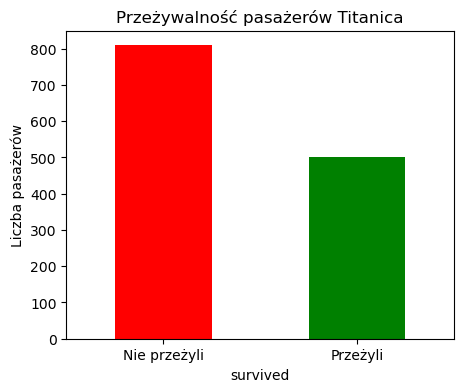

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
df['survived'].value_counts().plot(kind='bar', color=['red','green'])
plt.xticks([0,1], ['Nie przeżyli', 'Przeżyli'], rotation=0)
plt.ylabel("Liczba pasażerów")
plt.title("Przeżywalność pasażerów Titanica")
plt.show()

Analiza kolumny survived pokazuje, że katastrofę Titanica przeżyła część pasażerów, jednak większość zginęła.
Łącznie 500 osób przeżyło (ok. 38% wszystkich pasażerów), natomiast 809 osób nie przeżyło (ok. 62%).

Oznacza to, że szansa na przeżycie wynosiła poniżej 50% i już na tym etapie widać, że dalsza analiza powinna wyjaśnić, jakie czynniki zwiększały prawdopodobieństwo przeżycia.

#### **Wpływ płci na przeżywalność**
Tabela i wykres pokazują liczbę pasażerów oraz procent przeżywalności w podziale na kobiety i mężczyzn.  
Celem jest sprawdzenie, czy płeć miała znaczenie dla szans przeżycia.

In [14]:
# Zamieniamy etykiety na polskie dla spójności
df_clean = df.copy()
df_clean['sex'] = df_clean['sex'].map({'male': 'Mężczyzna', 'female': 'Kobieta'})

# Liczby i procenty
survival_by_sex = df_clean.groupby('sex')['survived'].agg(['count', 'sum'])
survival_by_sex['przeżyli (%)'] = round(survival_by_sex['sum'] / survival_by_sex['count'] * 100, 2)
survival_by_sex.rename(columns={'count':'Liczba osób', 'sum':'Przeżyło'}, inplace=True)
survival_by_sex

,Liczba osób,Przeżyło,przeżyli (%)
sex,,,
Kobieta,466,339.0,72.75
Mężczyzna,843,161.0,19.10


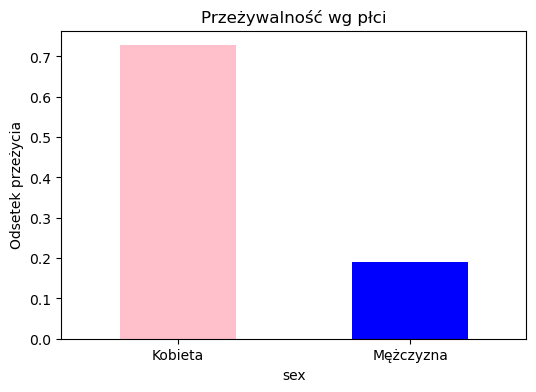

In [15]:
plt.figure(figsize=(6,4))
df_clean.groupby('sex')['survived'].mean().plot(kind='bar', color=['pink','blue'])
plt.xticks(rotation=0)
plt.ylabel("Odsetek przeżycia")
plt.title("Przeżywalność wg płci")
plt.show()

**Analiza pokazała duże różnice między płciami:**

- Kobiety: przeżyło **339 z 466** (≈ **72%**)  
- Mężczyźni: przeżyło **161 z 843** (≈ **19%**)  

Wykres potwierdza, że kobiety miały znacznie większe szanse na przeżycie, co jest zgodne z zasadą "kobiety i dzieci pierwsze".

#### **Wpływ klasy podróży na przeżywalność**
Analiza przeżywalności w podziale na klasy biletowe (1, 2 i 3).  
Zestawiono liczbę pasażerów w każdej klasie, ilu z nich przeżyło oraz procent przeżycia.  
Wizualizacja pozwala sprawdzić, czy wyższa klasa podróży dawała większe szanse przeżycia.

In [16]:
 # Zamieniamy klasy na bardziej czytelne
df_clean['pclass'] = df_clean['pclass'].map({1: '1 klasa', 2: '2 klasa', 3: '3 klasa'})

# Liczby i procenty
survival_by_class = df_clean.groupby('pclass')['survived'].agg(['count','sum'])
survival_by_class['przeżyli (%)'] = round(survival_by_class['sum'] / survival_by_class['count'] * 100, 2)
survival_by_class.rename(columns={'count':'Liczba osób', 'sum':'Przeżyło'}, inplace=True)
survival_by_class


,Liczba osób,Przeżyło,przeżyli (%)
pclass,,,
1 klasa,323,200.0,61.92
2 klasa,277,119.0,42.96
3 klasa,709,181.0,25.53


Analiza przeżywalności w podziale na klasy pokazuje wyraźne różnice:

- **1 klasa**: przeżyło 200 z 323 pasażerów (≈ 61,9%)  
- **2 klasa**: przeżyło 119 z 277 pasażerów (≈ 43,0%)  
- **3 klasa**: przeżyło 181 z 709 pasażerów (≈ 25,5%)  

Wyniki potwierdzają, że pasażerowie z wyższych klas mieli znacznie większe szanse na przeżycie.  
Największą przeżywalność odnotowano w 1. klasie (ponad 60%), natomiast pasażerowie 3. klasy byli najbardziej narażeni – tylko 1 na 4 osoby przeżyły katastrofę.

#### **Wpływ wieku na przeżywalność**
Tabela pokazuje podstawowe statystyki wieku pasażerów w podziale na przeżyłych i nieprzeżyłych.  
Dodatkowo wykres pudełkowy (boxplot) pozwala porównać rozkład wieku między obiema grupami,  
co ułatwia ocenę, czy wiek miał wpływ na szanse przeżycia.

In [17]:
# Kopia danych do analizy
df_clean = df.copy()

# Zamiana wartości w survived na czytelne etykiety
df_clean['survived'] = df_clean['survived'].map({0: 'Nie przeżył', 1: 'Przeżył'})

In [18]:
# Podstawowe statystyki wieku w podziale na status przeżycia
df_clean.groupby('survived')['age'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
Nie przeżył,619.0,30.55,13.92,0.33,21.0,28.0,39.0,74.0
Przeżył,427.0,28.92,15.06,0.17,20.0,28.0,38.0,80.0


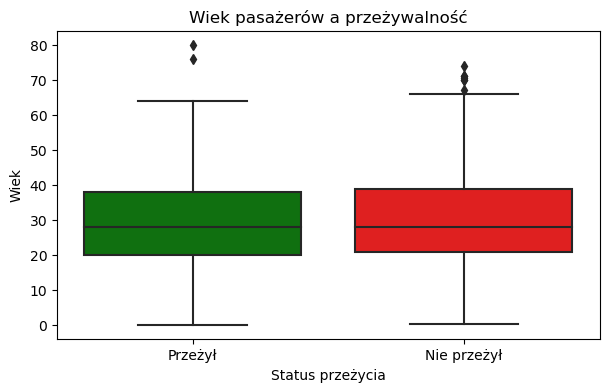

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
sns.boxplot(x='survived', y='age', data=df_clean, palette={"Nie przeżył": "red", "Przeżył": "green"})
plt.xlabel("Status przeżycia")
plt.ylabel("Wiek")
plt.title("Wiek pasażerów a przeżywalność")
plt.show()


**Analiza wieku pasażerów w podziale na status przeżycia pokazuje, że:**

- **Osoby, które nie przeżyły**: średni wiek wynosił ok. **30,6 roku**,  
  mediana **28 lat**, najmłodsza ofiara miała zaledwie kilka miesięcy,  
  a najstarsza osoba w tej grupie miała **74 lata**.  

- **Osoby, które przeżyły**: średni wiek wynosił ok. **28,9 roku**,  
  mediana również **28 lat**, a najmłodszy ocalały miał kilka miesięcy,  
  natomiast najstarszy miał aż **80 lat**.  

Wyniki sugerują, że **różnice wieku między grupami nie były duże**,  
choć można zauważyć, że wśród ocalałych znajdowało się nieco więcej młodszych osób oraz d

#### **Wpływ portu wejścia na pokład**
Poniższa tabela i wykres prezentują przeżywalność pasażerów w zależności od portu wejścia na pokład:  
Southampton, Cherbourg oraz Queenstown.  
Analiza pozwala ocenić, czy miejsce zaokrętowania miało wpływ na szanse przeżycia.

In [20]:
# Zamiana portów na pełne nazwy
df_clean['embarked'] = df_clean['embarked'].map({
    'S': 'Southampton',
    'C': 'Cherbourg',
    'Q': 'Queenstown'
})

# Grupowanie po porcie wejścia i obliczenie liczby oraz procentu przeżycia
survival_by_port = df_clean.groupby('embarked')['survived'].agg(['count', lambda x: (x == "Przeżył").sum()])
survival_by_port.columns = ['Liczba osób', 'Przeżyło']
survival_by_port['przeżyli (%)'] = round(survival_by_port['Przeżyło'] / survival_by_port['Liczba osób'] * 100, 2)
survival_by_port


,Liczba osób,Przeżyło,przeżyli (%)
embarked,,,
Cherbourg,270,150,55.56
Queenstown,123,44,35.77
Southampton,914,304,33.26


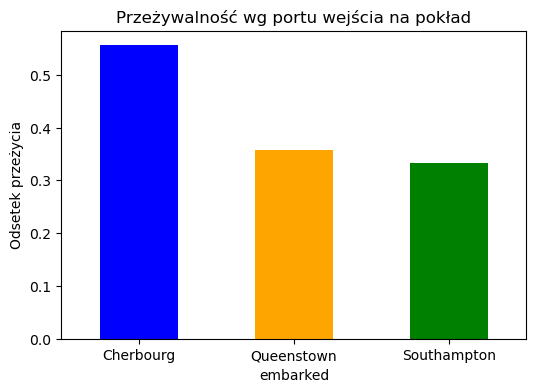

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df_clean.groupby('embarked')['survived'].apply(lambda x: (x=="Przeżył").mean()).plot(kind='bar', color=['blue','orange','green'])
plt.xticks(rotation=0)
plt.ylabel("Odsetek przeżycia")
plt.title("Przeżywalność wg portu wejścia na pokład")
plt.show()


**Analiza przeżywalności w zależności od portu wejścia na pokład pokazała wyraźne różnice:**

- **Cherbourg**: przeżyło 150 z 270 osób (≈ 55,6%)  
- **Queenstown**: przeżyło 44 ze 123 osób (≈ 35,8%)  
- **Southampton**: przeżyło 304 z 914 osób (≈ 33,3%)  

Najwyższą przeżywalność odnotowano wśród pasażerów wsiadających w **Cherbourgu**,  
gdzie przeżyła ponad połowa podróżnych. Najniższe wskaźniki przeżycia mieli pasażerowie  
z **Southampton** oraz **Queenstown** (około 1/3 osób).  

Różnice te można częściowo tłumaczyć strukturą pasażerów – w Cherbourgu na pokład wsiadało wielu pasażerów 1. klasy,  
podczas gdy w Southampton dominowali podróżni z 3. klasy.

#### **Wpływ liczby krewnych na pokładzie na przeżywalność**

In [22]:
# Kopia danych dla przejrzystości
df_clean = df_clean.rename(columns={
    'sibsp': 'rodzeństwo/małżonkowie',
    'parch': 'rodzice/dzieci'
})

Dwie poniższe analizy pokazują przeżywalność w zależności od liczby krewnych na pokładzie:  
- rodzeństwa/małżonków (`sibsp`),  
- rodziców/dzieci (`parch`).  

Dla każdej z tych zmiennych przygotowano tabelę i wykres, aby sprawdzić, czy podróżowanie z rodziną zwiększało szanse przeżycia.

* Tabela i wykres przeżywalności w zależności od liczby rodzeństwa/małżonków na pokładzie 

In [23]:
# Tabela
survival_by_sibsp = df_clean.groupby('rodzeństwo/małżonkowie')['survived'].agg(['count', lambda x: (x=="Przeżył").sum()])
survival_by_sibsp.columns = ['Liczba pasażerów', 'Przeżyło']
survival_by_sibsp['Przeżyli (%)'] = round(survival_by_sibsp['Przeżyło'] / survival_by_sibsp['Liczba pasażerów'] * 100, 2)
survival_by_sibsp

,Liczba pasażerów,Przeżyło,Przeżyli (%)
rodzeństwo/małżonkowie,,,
0.0,891,309,34.68
1.0,319,163,51.10
2.0,42,19,45.24
3.0,20,6,30.00
4.0,22,3,13.64
5.0,6,0,0.00
8.0,9,0,0.00


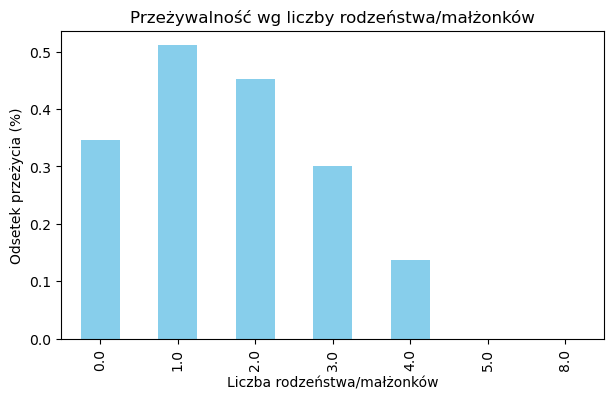

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
df_clean.groupby('rodzeństwo/małżonkowie')['survived'].apply(lambda x: (x=="Przeżył").mean()).plot(kind='bar', color='skyblue')

plt.ylabel("Odsetek przeżycia (%)")
plt.xlabel("Liczba rodzeństwa/małżonków")
plt.title("Przeżywalność wg liczby rodzeństwa/małżonków")
plt.show()

* Tabela i wykres przeżywalności w zależności od liczby rodzice/dzieciw na pokładzie

In [25]:
# Tabela
survival_by_parch = df_clean.groupby('rodzice/dzieci')['survived'].agg(['count', lambda x: (x=="Przeżył").sum()])
survival_by_parch.columns = ['Liczba pasażerów', 'Przeżyło']
survival_by_parch['Przeżyli (%)'] = round(survival_by_parch['Przeżyło'] / survival_by_parch['Liczba pasażerów'] * 100, 2)
survival_by_parch


,Liczba pasażerów,Przeżyło,Przeżyli (%)
rodzice/dzieci,,,
0.0,1002,336,33.53
1.0,170,100,58.82
2.0,113,57,50.44
3.0,8,5,62.50
4.0,6,1,16.67
5.0,6,1,16.67
6.0,2,0,0.00
9.0,2,0,0.00


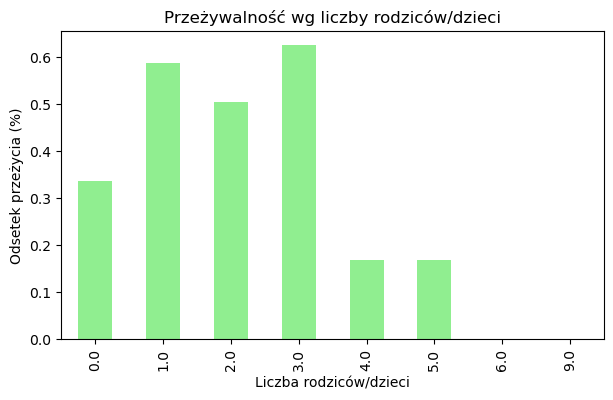

In [26]:
plt.figure(figsize=(7,4))
df_clean.groupby('rodzice/dzieci')['survived'].apply(lambda x: (x=="Przeżył").mean()).plot(kind='bar', color='lightgreen')

plt.ylabel("Odsetek przeżycia (%)")
plt.xlabel("Liczba rodziców/dzieci")
plt.title("Przeżywalność wg liczby rodziców/dzieci")
plt.show()


- **Rodzeństwo/małżonkowie (sibsp):** najwyższą przeżywalność miały osoby podróżujące z 1–2 osobami (ok. 45–51%). Samotni pasażerowie przeżywali rzadziej (34%), a przy dużych rodzinach (5 i więcej osób) szanse spadały do 0%.  

- **Rodzice/dzieci (parch):** największe szanse miały osoby z 1–3 towarzyszącymi (50–62%). Samotni pasażerowie przeżywali w 33%, a w większych rodzinach (4+) przeżywalność gwałtownie malała.  

Najlepsze szanse mieli pasażerowie w **małych rodzinach (1–2 osoby)**, podczas gdy osoby samotne lub w dużych grupach miały dużo niższe wskaźniki przeżycia.


**Wnioski – Analiza szczegółowa przeżywalności pasażerów**

Analiza szczegółowa pokazała, że przeżywalność pasażerów Titanica była silnie zróżnicowana w zależności od cech demograficznych i warunków podróży:

- **Płeć:** kobiety miały zdecydowanie wyższe szanse na przeżycie niż mężczyźni.  
- **Klasa:** im wyższa klasa podróży, tym większa przeżywalność (ponad 60% w 1. klasie wobec 25% w 3. klasie).  
- **Wiek:** młodsze osoby, zwłaszcza dzieci, miały większe szanse, choć różnice średniego wieku między grupami były niewielkie.  
- **Port wejścia:** najwyższą przeżywalność mieli pasażerowie wsiadający w Cherbourgu, najniższą w Southampton.  
- **Rodzina:** największe szanse mieli podróżni w małych rodzinach (1–2 osoby towarzyszące). Samotni oraz osoby w dużych grupach miały znacznie gorsze wyniki.  

Widać więc wyraźnie, że o przeżyciu decydowały nie tylko indywidualne cechy (płeć, wiek), ale także status społeczny (klasa podróży) oraz kontekst podróży (rodzina, miejsce zaokrętowania).

## **4. Wizualizacja danych i wyników analizy**
#### **Mapa cieplna korelacji**
Mapa cieplna przedstawia zależności między zmiennymi numerycznymi w zbiorze danych 
(`age`, `fare`, `sibsp`, `parch`, `pclass`, `survived`). 
Kolory oznaczają siłę i kierunek korelacji – wartości bliskie 1 to silna zależność dodatnia, 
a wartości bliskie -1 to silna zależność ujemna.

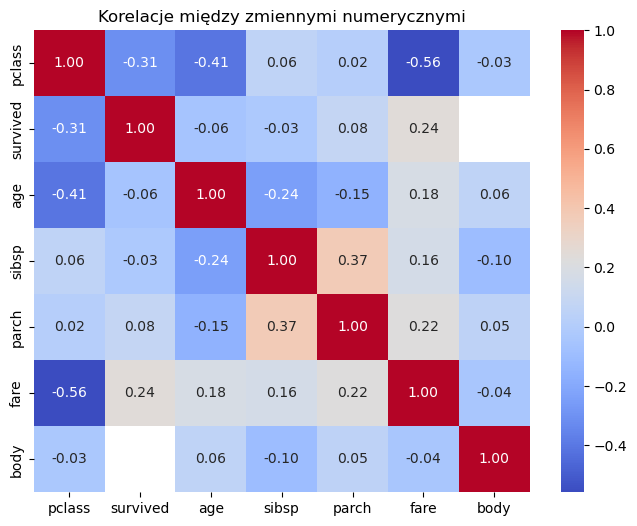

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelacje między zmiennymi numerycznymi")
plt.show()

* Klasa podróży (pclass) jest ujemnie skorelowana z przeżyciem (-0.31) – im niższa klasa, tym mniejsze szanse przeżycia.

* Cena biletu (fare) jest dodatnio skorelowana z przeżyciem (0.24) – wyższe ceny (zwykle w 1. klasie) wiązały się z większą szansą ocalenia.

* Wiek (age) praktycznie nie był powiązany z przeżyciem (-0.06).

* sibsp i parch są ze sobą dodatnio powiązane (0.37), co jest logiczne – większe rodziny zwykle miały wpisy w obu kolumnach.

* fare i pclass są silnie skorelowane ujemnie (-0.56) – bilety 1. klasy były dużo droższe niż 3.

Ogólnie widać, że największe znaczenie dla przeżycia miały klasa podróży i cena biletu.

#### **Cena biletu wg klasy i statusu przeżyci**
Boxplot pokazuje rozkład cen biletów w podziale na klasy podróży oraz status przeżycia.  
Pozwala sprawdzić, czy pasażerowie płacący więcej (często w 1. klasie) mieli większe szanse na przeżycie.

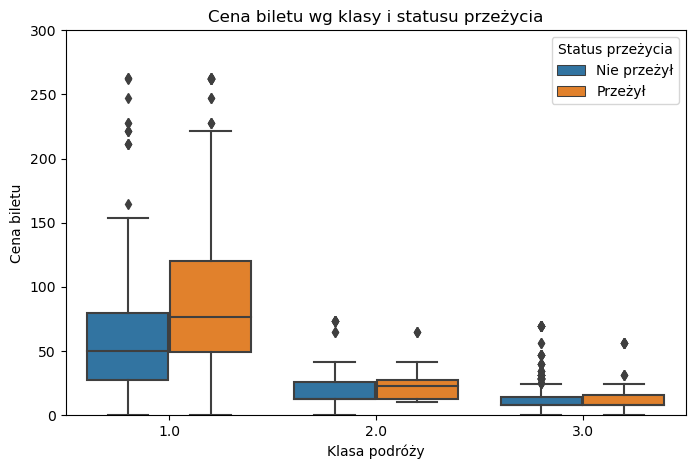

In [28]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x="pclass", y="fare", hue="survived", data=df_clean,
    hue_order=["Nie przeżył", "Przeżył"],
    dodge=True
)
plt.title("Cena biletu wg klasy i statusu przeżycia")
plt.xlabel("Klasa podróży")
plt.ylabel("Cena biletu")
plt.ylim(0, 300)  # opcjonalnie, aby uciąć ekstremalnie drogie bilety
plt.legend(title="Status przeżycia")
plt.show()


**Wykres potwierdza silny związek ceny biletu, klasy i przeżycia:**

- Pasażerowie **1. klasy** płacili najwyższe ceny i mieli największe szanse przeżycia.  
- W **2. klasie** ceny były niższe, a różnice w przeżywalności mniejsze.  
- W **3. klasie** bilety były najtańsze, a przeżywalność wyraźnie niższa.  

Cena biletu i klasa podróży były mocno powiązane z prawdopodobieństwem przeżycia.


#### **Wiek a przeżycie w podziale na płeć**
Poniższy wykres pokazuje rozkład wieku pasażerów z podziałem na płeć i status przeżycia.  
Pozwala sprawdzić, czy młodsze osoby (szczególnie dzieci) oraz kobiety miały większe szanse na przeżycie.

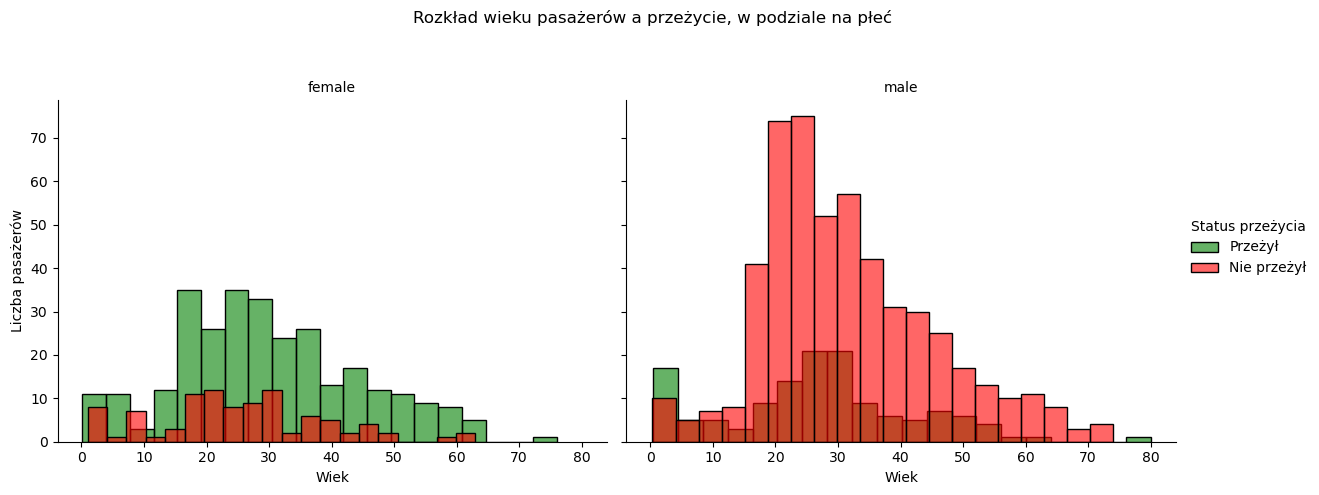

In [29]:
g = sns.FacetGrid(df_clean, col="sex", hue="survived", height=5, aspect=1.2, 
                  palette={"Nie przeżył":"red", "Przeżył":"green"})
g.map(sns.histplot, "age", bins=20, alpha=0.6, kde=False)
g.add_legend(title="Status przeżycia")
g.set_axis_labels("Wiek", "Liczba pasażerów")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Rozkład wieku pasażerów a przeżycie, w podziale na płeć")
plt.show()


**Widać wyraźne różnice między kobietami a mężczyznami:**

- **Kobiety**: zdecydowanie większy udział pasażerek, które przeżyły. Dotyczy to prawie wszystkich grup wiekowych.  
- **Mężczyźni**: dominują wśród osób, które nie przeżyły, szczególnie w wieku 20–40 lat.  
- **Dzieci**: zarówno chłopcy, jak i dziewczynki, miały większe szanse przeżycia niż dorośli pasażerowie.  

Wykres jednoznacznie pokazuje zasadę *„kobiety i dzieci pierwsze”*, stosowaną podczas ewakuacji.


#### **Wnioski - Wizualizacja danych i wyników analizy**

Dodatkowe wizualizacje potwierdziły kluczowe wnioski z analizy:

- **Klasa i cena biletu** były silnie związane z przeżyciem – pasażerowie 1. klasy, płacący wyższe ceny, mieli większe szanse na ocalenie.  
- **Płeć i wiek** odegrały ogromną rolę – kobiety oraz dzieci przeżywały znacznie częściej niż dorośli mężczyźni.  
- **Korelacje między zmiennymi** pokazały, że najważniejsze czynniki to klasa podróży i koszt biletu, natomiast wiek miał niewielki wpływ.  

Wizualizacje w przejrzysty sposób potwierdziły wcześniejsze obserwacje i ułatwiły zrozumienie zależności w danych.


## ✅ Podsumowanie analizy 
Analiza danych o pasażerach Titanica pozwoliła wskazać kluczowe czynniki wpływające na przeżywalność:

- **Płeć:** kobiety miały zdecydowanie większe szanse na przeżycie niż mężczyźni.  
- **Klasa podróży:** pasażerowie 1. klasy przeżywali najczęściej, a podróżni 3. klasy najrzadziej.  
- **Wiek:** dzieci i młodsze osoby miały większe szanse na ocalenie, co odzwierciedlało zasadę „kobiety i dzieci pierwsze”.  
- **Port wejścia:** najwyższą przeżywalność odnotowano wśród pasażerów wsiadających w Cherbourgu.  
- **Rodzina na pokładzie:** największe szanse miały osoby podróżujące w małych rodzinach (1–2 osoby towarzyszące).  

Dodatkowe wizualizacje potwierdziły, że o przeżyciu decydował przede wszystkim **status społeczny (klasa podróży, cena biletu)** oraz **czynniki demograficzne (płeć i wiek)**.  

Podsumowując: dane jednoznacznie wskazują, że przeżycie na Titanicu było w dużej mierze zdeterminowane przez hierarchię społeczną i zasady ewakuacji, a nie przez przypadek.